https://www.kaggle.com/c/facial-keypoints-detection

## Package import

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

In [5]:
random_state = 42

## Data read

In [6]:
os.listdir('Data')

['.ipynb_checkpoints',
 'IdLookupTable.csv',
 'SampleSubmission.csv',
 'test.csv',
 'training.csv']

In [7]:
idlookuptable = pd.read_csv('Data/IdLookupTable.csv')

In [8]:
idlookuptable.shape

(27124, 4)

In [9]:
idlookuptable.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [10]:
idlookuptable.tail()

,RowId,ImageId,FeatureName,Location
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN
27123,27124,1783,mouth_center_bottom_lip_y,NaN


In [11]:
idlookuptable.ImageId.value_counts()

16      30
266     30
563     30
579     30
586     30
        ..
1161     8
1177     8
1193     8
957      6
782      6
Name: ImageId, Length: 1783, dtype: int64

In [12]:
samplesubmission = pd.read_csv('Data/SampleSubmission.csv')

In [13]:
samplesubmission.shape

(27124, 2)

In [14]:
samplesubmission.head()

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [15]:
test = pd.read_csv('Data/test.csv')

In [16]:
train = pd.read_csv('Data/training.csv')

In [17]:
test.shape

(1783, 2)

In [18]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [19]:
test.dtypes

ImageId     int64
Image      object
dtype: object

In [20]:
image_test_arr = pd.Series(test.Image[0].split(' ')).astype(int)

In [21]:
len(image_test_arr)

9216

In [22]:
np.sqrt(len(image_test_arr))

96.0

In [23]:
image_test_df = image_test_arr.values.reshape((96,96))

In [24]:
image_test_arr

0       182
1       183
2       182
3       182
4       180
       ... 
9211     18
9212     12
9213      8
9214      5
9215      5
Length: 9216, dtype: int32

In [25]:
image_test_df

array([[182, 183, 182, ..., 182, 182, 182],
       [182, 181, 181, ..., 182, 182, 182],
       [182, 181, 180, ..., 182, 181, 182],
       ...,
       [ 42,  36,  20, ..., 126, 136, 153],
       [ 31,   8,   0, ...,   9,  11,  33],
       [  3,   0,   1, ...,   8,   5,   5]])

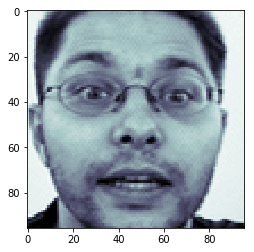

In [26]:
plt.imshow(image_test_df, cmap=plt.cm.bone, interpolation='nearest')

In [27]:
all_featues = train.columns.to_series().iloc[0:-1].str.replace('_x|_y', '').unique()

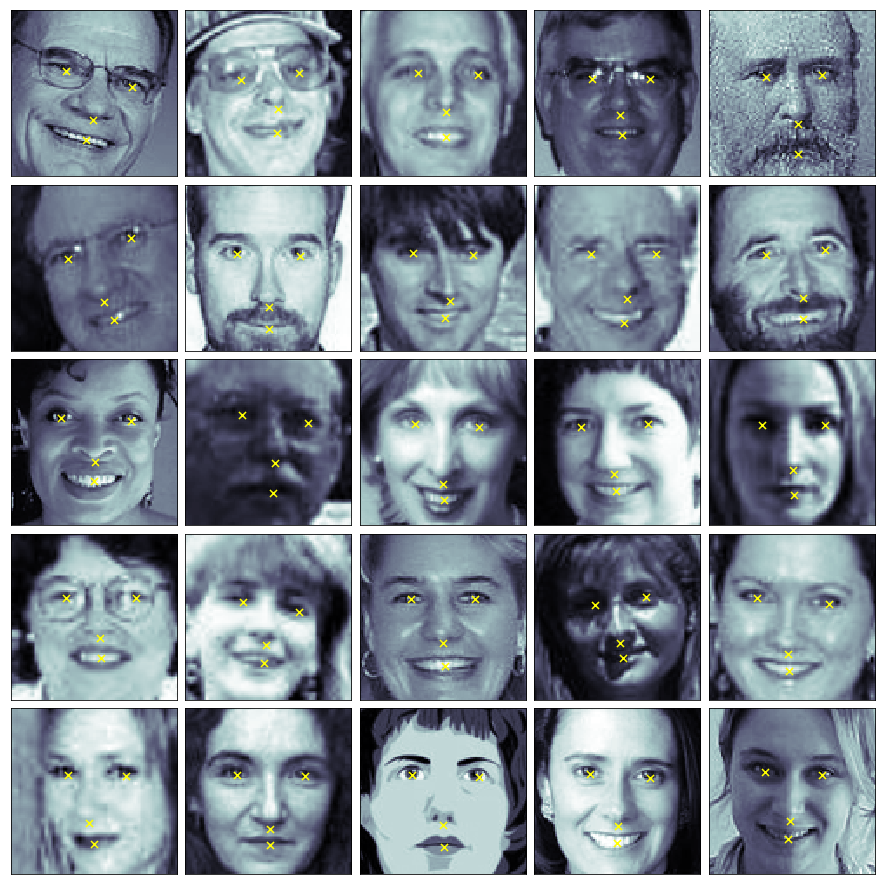

In [28]:
fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
start = 6000
for i in range(start, start+25, 1):
    
    ax = fig.add_subplot(5, 5, i + 1 - start, xticks=[], yticks=[])
    ax.imshow(pd.Series(train.iloc[i].Image.split(' ')).astype(int).values.reshape((96,96)),
              cmap=plt.cm.bone, interpolation='nearest')
    ax.scatter(train.iloc[i][all_featues + '_x'], train.iloc[i][all_featues + '_y'], s=50, c='yellow', marker='x')
plt.show()

In [29]:
train.shape

(7049, 31)

In [30]:
train.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [31]:
train.head().iloc[:,0:-1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [32]:
train.columns.to_series().iloc[0:-1].shape

(30,)

In [33]:
all_featues.shape

(15,)

In [34]:
train.iloc[0][all_featues + '_x']

left_eye_center_x            66.0336
right_eye_center_x            30.227
left_eye_inner_corner_x      59.5821
left_eye_outer_corner_x      73.1303
right_eye_inner_corner_x     36.3566
right_eye_outer_corner_x     23.4529
left_eyebrow_inner_end_x     56.9533
left_eyebrow_outer_end_x     80.2271
right_eyebrow_inner_end_x    40.2276
right_eyebrow_outer_end_x    16.3564
nose_tip_x                   44.4206
mouth_left_corner_x          61.1953
mouth_right_corner_x         28.6145
mouth_center_top_lip_x       43.3126
mouth_center_bottom_lip_x    43.1307
Name: 0, dtype: object

In [35]:
len(train)

7049

In [36]:
train.isnull().sum()/len(train)*100

left_eye_center_x             0.141864
left_eye_center_y             0.141864
right_eye_center_x            0.184423
right_eye_center_y            0.184423
left_eye_inner_corner_x      67.782664
left_eye_inner_corner_y      67.782664
left_eye_outer_corner_x      67.839410
left_eye_outer_corner_y      67.839410
right_eye_inner_corner_x     67.825223
right_eye_inner_corner_y     67.825223
right_eye_outer_corner_x     67.825223
right_eye_outer_corner_y     67.825223
left_eyebrow_inner_end_x     67.796851
left_eyebrow_inner_end_y     67.796851
left_eyebrow_outer_end_x     68.435239
left_eyebrow_outer_end_y     68.435239
right_eyebrow_inner_end_x    67.796851
right_eyebrow_inner_end_y    67.796851
right_eyebrow_outer_end_x    68.279189
right_eyebrow_outer_end_y    68.279189
nose_tip_x                    0.000000
nose_tip_y                    0.000000
mouth_left_corner_x          67.811037
mouth_left_corner_y          67.811037
mouth_right_corner_x         67.796851
mouth_right_corner_y     

In [37]:
train.head().Image.str.split(' ')

0    [238, 236, 237, 238, 240, 240, 239, 241, 241, ...
1    [219, 215, 204, 196, 204, 211, 212, 200, 180, ...
2    [144, 142, 159, 180, 188, 188, 184, 180, 167, ...
3    [193, 192, 193, 194, 194, 194, 193, 192, 168, ...
4    [147, 148, 160, 196, 215, 214, 216, 217, 219, ...
Name: Image, dtype: object

In [38]:
pixel_values = train.Image.str.split(' ').apply(pd.Series)

In [39]:
pixel_values.columns = 'pixel_' + pixel_values.columns.astype(str)

In [40]:
train = pd.concat((train, pixel_values), axis = 1)

In [44]:
train.to_feather('SaveFiles/train.feather')

In [45]:
pixel_values_test = test.Image.str.split(' ').apply(pd.Series)

In [46]:
pixel_values_test.columns = 'pixel_' + pixel_values_test.columns.astype(str)

In [47]:
test = pd.concat((test, pixel_values_test), axis = 1)

In [48]:
test.to_feather('SaveFiles/test.feather')